# Cameron Chow

## Research question/interests

I am mainly interested in the relationship between the victims being armed vs their race. I believe that analyzing this relationship could determine how much bias played in these deaths. In addition to this, the mental state of the victims is another area of interest to me.

In [ ]:
import pandas as pd
import numpy as nd

In [ ]:
pd.__version__

'1.4.3'

In [ ]:
dataFrame = pd.read_csv('../data/raw/data.csv',encoding="ISO-8859-1")

In [ ]:
dataFrame

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
12486,12388,Name withheld by police,NaN,Male,NaN,12/9/2008,Sacramento,CA,Other,NaN,False,False
12487,12429,Gene Lovell Ford,48.0,Male,NaN,8/6/2008,Sacramento,CA,Other,NaN,True,False
12488,12430,Jose Vega,38.0,Male,NaN,8/6/2008,Visalia,CA,Other,NaN,True,False
12489,12636,Humberto Torres,41.0,Male,NaN,3/21/2009,Delano,CA,Other,Gun,False,False


## EDA: Description of the Dataset

This Dataset, created by the user Chris Awram, focuses on people killed in the US by the police force between 2000-2016. He used three sources, https://fatalencounters.org/, https://www.gunviolencearchive.org/, and another Data World dataset whose source was https://github.com/washingtonpost/data-police-shootings.

In [ ]:
#imported packages 

import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [ ]:
pd.__version__

'1.4.3'

## Loading the Data

In [ ]:
df = pd.read_csv('../data/raw/data.csv',encoding="ISO-8859-1")

In [ ]:
df.info() # Allows me to find the three columns I would like to focus on

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UID              12491 non-null  int64  
 1   Name             12491 non-null  object 
 2   Age              12258 non-null  float64
 3   Gender           12483 non-null  object 
 4   Race             8526 non-null   object 
 5   Date             12491 non-null  object 
 6   City             12487 non-null  object 
 7   State            12491 non-null  object 
 8   Manner_of_death  12491 non-null  object 
 9   Armed            6814 non-null   object 
 10  Mental_illness   12491 non-null  bool   
 11  Flee             12491 non-null  bool   
dtypes: bool(2), float64(1), int64(1), object(8)
memory usage: 1000.4+ KB


In [ ]:
#Preview of what the Dataset looks like
df.head()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False


# Columns Chosen: Gender, Race, State

In [ ]:
# Description of the Gender Column
df["Gender"].describe()

count     12483
unique        2
top        Male
freq      11870
Name: Gender, dtype: object

In [ ]:
#Unique Genders of Individuals
df['Gender'].value_counts(dropna=False)

Male      11870
Female      613
NaN           8
Name: Gender, dtype: int64

In [ ]:
#Description of the Race Column
df["Race"].describe()

count      8526
unique        6
top       White
freq       3855
Name: Race, dtype: object

In [ ]:
# Unique Races of individuals
df['Race'].value_counts(dropna=False)

NaN         3965
White       3855
Black       2536
Hispanic    1784
Asian        173
Native       130
Other         48
Name: Race, dtype: int64

In [ ]:
#Description of the State Column
df["State"].describe()

count     12491
unique       51
top          CA
freq       2913
Name: State, dtype: object

In [ ]:
#Unique States
df['State'].value_counts(dropna=False)

CA    2913
TX    1190
FL    1028
AZ     585
NY     390
LA     350
AL     326
CO     310
NC     308
WA     304
IL     301
GA     285
NV     276
OH     241
OR     212
MD     195
PA     189
MO     188
MS     176
MN     175
OK     169
NM     162
TN     162
UT     153
VA     148
MI     128
SC     127
NJ     124
MA     120
WI     109
IN     106
KY     105
KS     103
ID      88
CT      78
AK      73
AR      70
DC      61
WV      60
MT      57
ME      51
NE      50
IA      41
WY      35
DE      32
SD      32
NH      29
HI      22
VT      21
RI      20
ND      13
Name: State, dtype: int64

In [ ]:
df = df.dropna(subset = ['Race'])
df = df.dropna(subset = ['Gender'])
df

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8521,12871,Joseph Frank Kennedy,48.0,Male,White,9/18/2010,La Mirada,CA,Tasered,NaN,False,False
8522,12978,Daniel Sylvester,35.0,Male,White,6/22/2010,Crescent City,CA,Tasered,NaN,True,False
8523,12996,Mario Marin,53.0,Male,White,12/28/2011,Santa Ana,CA,Tasered,NaN,True,False
8524,13083,James Robert Hudson,34.0,Male,White,4/9/2011,Whittier,CA,Tasered,NaN,True,False


In [ ]:
#Checking that the null values of Race have been removed
df.isnull().sum()

UID                   0
Name                  0
Age                  68
Gender                0
Race                  0
Date                  0
City                  1
State                 0
Manner_of_death       0
Armed              3711
Mental_illness        0
Flee                  0
dtype: int64

## Data Wrangling/Representation

In [ ]:
#This gives us the number of victims by Race for each State
victimsByRace = df.groupby("State").Race.value_counts(dropna=False)
victimsByRace

State  Race    
AK     White       16
       Native      12
       Black        3
       Hispanic     1
       Other        1
                   ..
WV     White       30
       Black        6
WY     White       18
       Hispanic     2
       Native       1
Name: Race, Length: 206, dtype: int64

In [ ]:
victimsByRace.index

MultiIndex([('AK',    'White'),
            ('AK',   'Native'),
            ('AK',    'Black'),
            ('AK', 'Hispanic'),
            ('AK',    'Other'),
            ('AL',    'White'),
            ('AL',    'Black'),
            ('AL', 'Hispanic'),
            ('AL',    'Asian'),
            ('AR',    'White'),
            ...
            ('WA',    'Other'),
            ('WI',    'White'),
            ('WI',    'Black'),
            ('WI', 'Hispanic'),
            ('WI',    'Asian'),
            ('WV',    'White'),
            ('WV',    'Black'),
            ('WY',    'White'),
            ('WY', 'Hispanic'),
            ('WY',   'Native')],
           names=['State', 'Race'], length=206)

In [ ]:
#Represents our found data in a table
victimsByRace.unstack()

Race,Asian,Black,Hispanic,Native,Other,White
State,,,,,,
AK,NaN,3.0,1.0,12.0,1.0,16.0
AL,1.0,80.0,7.0,NaN,NaN,98.0
AR,NaN,16.0,NaN,NaN,NaN,36.0
AZ,1.0,22.0,117.0,23.0,1.0,169.0
CA,97.0,420.0,882.0,20.0,24.0,580.0
CO,4.0,27.0,55.0,3.0,NaN,90.0
CT,1.0,18.0,12.0,NaN,NaN,36.0
DC,NaN,30.0,1.0,NaN,NaN,1.0
DE,NaN,6.0,NaN,NaN,NaN,10.0


In [ ]:
#Creates a new DF of the victims by race
df_victims = victimsByRace[['CA','TX','FL']]
df_victims

State  Race    
CA     Hispanic    882
       White       580
       Black       420
       Asian        97
       Other        24
       Native       20
TX     White       376
       Hispanic    301
       Black       237
       Asian         8
       Other         3
       Native        2
FL     White       243
       Black       224
       Hispanic     74
       Asian         5
       Other         2
       Native        1
Name: Race, dtype: int64

Text(0.5, 1.0, 'Victims By Race per State')

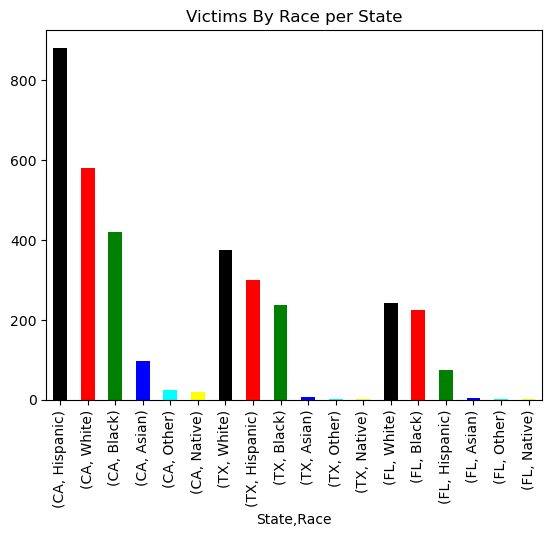

In [ ]:
df_victims.plot(x='State', y='Race', kind='bar', color=['black', 'red', 'green', 'blue', 'cyan', 'yellow'])
plt.title('Victims By Race per State')

# Figure 1:
This graph shows the fatality rates based on race

In [ ]:
#Doing the same as above, but with Gender instead
victimsByGender = df.groupby("State").Gender.value_counts(dropna=False)
victimsByGender

State  Gender
AK     Male       30
       Female      3
AL     Male      172
       Female     14
AR     Male       51
                ... 
WI     Female      5
WV     Male       33
       Female      3
WY     Male       19
       Female      2
Name: Gender, Length: 97, dtype: int64

In [ ]:
victimsByGender.index

MultiIndex([('AK',   'Male'),
            ('AK', 'Female'),
            ('AL',   'Male'),
            ('AL', 'Female'),
            ('AR',   'Male'),
            ('AR', 'Female'),
            ('AZ',   'Male'),
            ('AZ', 'Female'),
            ('CA',   'Male'),
            ('CA', 'Female'),
            ('CO',   'Male'),
            ('CO', 'Female'),
            ('CT',   'Male'),
            ('CT', 'Female'),
            ('DC',   'Male'),
            ('DC', 'Female'),
            ('DE',   'Male'),
            ('FL',   'Male'),
            ('FL', 'Female'),
            ('GA',   'Male'),
            ('GA', 'Female'),
            ('HI',   'Male'),
            ('HI', 'Female'),
            ('IA',   'Male'),
            ('IA', 'Female'),
            ('ID',   'Male'),
            ('ID', 'Female'),
            ('IL',   'Male'),
            ('IL', 'Female'),
            ('IN',   'Male'),
            ('IN', 'Female'),
            ('KS',   'Male'),
            ('KS', 'Female'),
          

In [ ]:
victimsByGender.unstack()

Gender,Female,Male
State,,
AK,3.0,30.0
AL,14.0,172.0
AR,1.0,51.0
AZ,20.0,313.0
CA,97.0,1926.0
CO,11.0,168.0
CT,1.0,66.0
DC,4.0,28.0
DE,NaN,16.0


In [ ]:
df_gender = victimsByGender[['CA','TX','FL']]
df_gender

State  Gender
CA     Male      1926
       Female      97
TX     Male       894
       Female      33
FL     Male       517
       Female      32
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Victims By Gender per State')

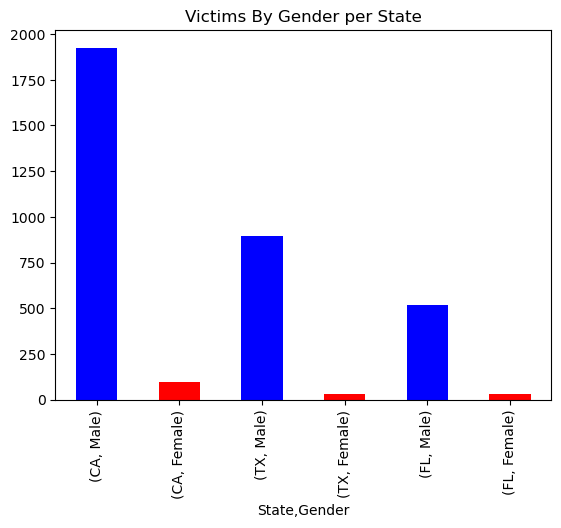

In [ ]:
df_gender.plot(x='State', y='Race', kind='bar', color=['blue', 'red',])
plt.title('Victims By Gender per State')

# Figure 2:
This graph shows the fatalities in every state based on Gender

# Research Questions and Graph Descriptions

### 1. Is there a racial bias between the states with the most victims?
After analyzing the data and observing the graph, there seems to be no racial bias between the states with the top death counts. Compared to incarceration rates, I was expecting the leading race in victims to be black. However, since this data only goes to 2016, the problems with the police force had not been addressed in as much detail as they do now. Even though the death count of hispanic people is significantly higher in California than other states, when analyzing all three states there is not enough context or data to conclude that racial bias played a part in these deaths.

### 2. Does State size/population affect the fatality rate?
California, Texas, and Florida have the highest fatality rates of police shootings, with California having over double the ammount of victims than the second highest state for fatalities, texas. This is interesting combined with the fact that texas is 1.6 times larger than california. However, becaue california has a much higher population, the numbers make sense. However, for a state such as florida (who is lower on both state size and populatin) the data makes less sense.There are multiple states (such as alaska and montana) that have relativly low numbers despite being the larger states. These states also have a respectable population number. Thus, the conclusion I have reached is that state size does not affect the fatality rate, but state population size does

In [ ]:
df.to_csv('data_processed.csv')